In [10]:
import os
from dotenv import load_dotenv
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

In [11]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–∑ .env —Ñ–∞–π–ª–∞
dotenv_path = r"C:\Users\palux\OneDrive\–î–æ–∫—É–º–µ–Ω—Ç—ã\Python files DS\VK_api\token.env"

load_dotenv(dotenv_path)

# –ü–æ–ª—É—á–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
ACCESS_TOKEN = os.getenv('ACCESS_TOKEN')
GROUP_ID = os.getenv('GROUP_ID')
API_VERSION = os.getenv('API_VERSION')


In [12]:
url = 'https://api.vk.com/method/groups.getMembers'

# –£–∑–Ω–∞–µ–º –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤
params_count = {
    'group_id': GROUP_ID,
    'access_token': ACCESS_TOKEN,
    'v': API_VERSION
}
response = requests.get(url, params=params_count).json()

if 'response' in response:
    total_count = response['response']['count']
    print(f"–í—Å–µ–≥–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤: {total_count}")
else:
    print("–û—à–∏–±–∫–∞ –ø—Ä–∏ –ø–æ–ª—É—á–µ–Ω–∏–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤:", response)
    total_count = 0

–í—Å–µ–≥–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤: 96243


In [14]:
# –£–∑–Ω–∞–µ–º –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤
params_count = {
    'group_id': GROUP_ID,
    'access_token': ACCESS_TOKEN,
    'v': API_VERSION
}
response = requests.get(url, params=params_count).json()
total_count = response['response']['count']
print(f"–í—Å–µ–≥–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤: {total_count}")

# –¶–∏–∫–ª –ø–æ –≤—Å–µ–º offset (–ø–æ 1000 –∑–∞ —Ä–∞–∑)
all_users = []

for offset in range(0, 10000, 1000):
    params = {
        'group_id': GROUP_ID,
        'fields': 'sex,bdate,city,universities,relation,personal,followers_count,last_seen,status,has_photo',
        'access_token': ACCESS_TOKEN,
        'v': API_VERSION,
        'count': 1000,
        'offset': offset
    }

    response = requests.get(url, params=params).json()

    if 'response' in response:
        users = response['response']['items']
        all_users.extend(users)
        print(f"–°–æ–±—Ä–∞–Ω–æ: {len(all_users)} –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π")
    else:
        print(f"–û—à–∏–±–∫–∞ –Ω–∞ offset {offset}: {response}")
        break

    time.sleep(0.01)  # –ü–∞—É–∑–∞ –º–µ–∂–¥—É –∑–∞–ø—Ä–æ—Å–∞–º–∏

# –í DataFrame
df = pd.DataFrame(all_users)

–í—Å–µ–≥–æ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤: 96243
–°–æ–±—Ä–∞–Ω–æ: 1000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–æ–±—Ä–∞–Ω–æ: 2000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–æ–±—Ä–∞–Ω–æ: 3000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–æ–±—Ä–∞–Ω–æ: 4000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–æ–±—Ä–∞–Ω–æ: 5000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–æ–±—Ä–∞–Ω–æ: 6000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–æ–±—Ä–∞–Ω–æ: 7000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–æ–±—Ä–∞–Ω–æ: 8000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–æ–±—Ä–∞–Ω–æ: 9000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–°–æ–±—Ä–∞–Ω–æ: 10000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π


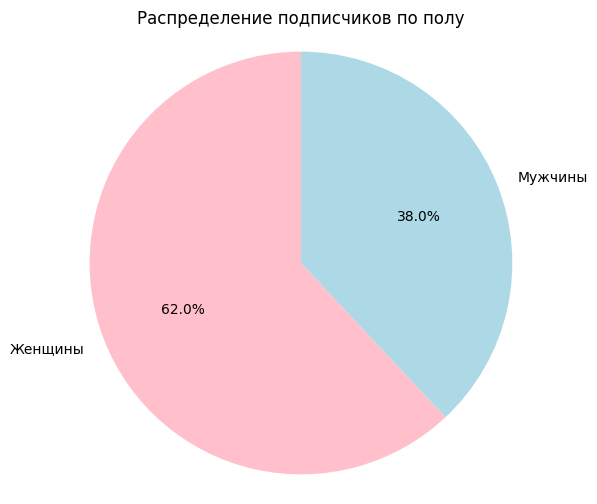

In [15]:
# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –ø–æ–ª 1 –∏ 2
df_sex = df[df['sex'].isin([1, 2])]

# –°—á–∏—Ç–∞–µ–º
sex_counts = df_sex['sex'].value_counts().sort_index()

# –ü–æ–¥–ø–∏—Å–∏
labels = ['–ñ–µ–Ω—â–∏–Ω—ã', '–ú—É–∂—á–∏–Ω—ã']

# –ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ –ø–æ –ø–æ–ª—É')
plt.axis('equal')
plt.show()


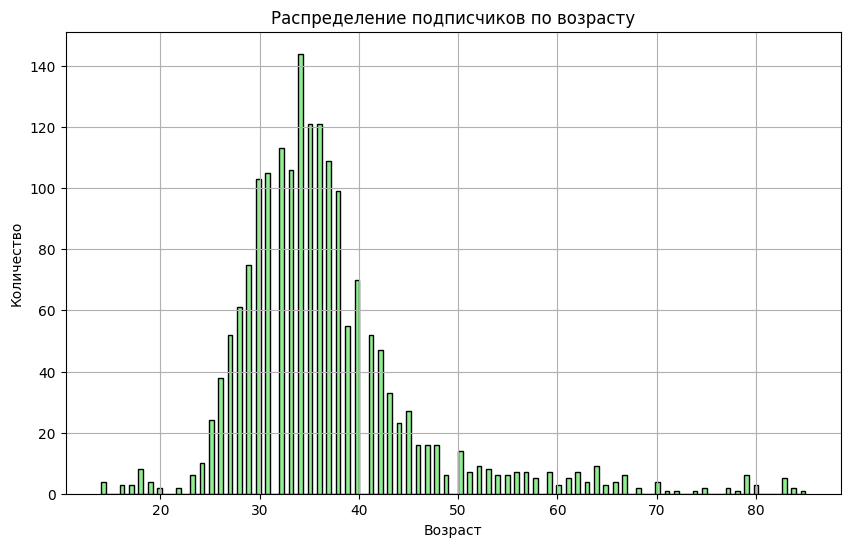

In [16]:
# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –ø–æ–ª–Ω–æ–π –¥–∞—Ç–æ–π —Ä–æ–∂–¥–µ–Ω–∏—è
df_bdate = df[df['bdate'].notnull()]
df_bdate = df_bdate[df_bdate['bdate'].str.count(r'\.') == 2]  # –ø–æ–ª–Ω—ã–µ –¥–∞—Ç—ã

# –í—ã—á–∏—Å–ª–∏–º –≤–æ–∑—Ä–∞—Å—Ç
def calculate_age(bdate_str):
    day, month, year = map(int, bdate_str.split('.'))
    today = datetime.datetime.today()
    age = today.year - year - ((today.month, today.day) < (month, day))
    return age

df_bdate['age'] = df_bdate['bdate'].apply(calculate_age)

# –û—Å—Ç–∞–≤–∏–º –≤–æ–∑—Ä–∞—Å—Ç 10-80 –ª–µ—Ç
df_age = df_bdate[(df_bdate['age'] >= 10) & (df_bdate['age'] <= 90)]

# –°—Ç–æ–ª–±—Ü–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞
plt.figure(figsize=(10, 6))
df_age['age'].plot(kind='hist', bins=150, color='lightgreen', edgecolor='black')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É')
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.grid(True)
plt.show()


In [17]:
# –ò–∑–≤–ª–µ–∫–∞–µ–º —Ç–æ–ª—å–∫–æ –Ω–∞–∑–≤–∞–Ω–∏–µ –≥–æ—Ä–æ–¥–∞
df['city_title'] = df['city'].apply(lambda x: x['title'] if pd.notna(x) and isinstance(x, dict) else None)

In [18]:
# –ë–µ–∑–æ–ø–∞—Å–Ω–æ–µ –∏–∑–≤–ª–µ—á–µ–Ω–∏–µ: —Å–Ω–∞—á–∞–ª–∞ –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ NaN, –∑–∞—Ç–µ–º –Ω–∞ list, –ø–æ—Ç–æ–º –Ω–∞ –∫–ª—é—á–∏
df['university_name'] = df['universities'].apply(
    lambda x: (
        x[0].get('name') or x[0].get('chair_name')
    ) if isinstance(x, list) and len(x) > 0 else None
)


–¢–æ–ø –≤—É–∑–æ–≤:
university
–¢—É–≤–ì–£                            89
–¢—ã–≤–ì–£                            87
–°–§–£                              19
–°–ò–£ –†–ê–ù–•–∏–ì–° (–°–∏–±–ê–ì–°)             15
–ë–ì–°–•–ê                            13
–ê–ì–ú–£\r\n                         12
–ú–ì–£                              12
–•–ì–£ (–±—ã–≤—à. –ê–ì–ü–ò) –∏–º. –ö–∞—Ç–∞–Ω–æ–≤–∞    11
–í–°–ì–ò–ö (–±—ã–≤—à. –í–°–ì–ê–ö–ò)             11
–ë–ì–£ (–±—ã–≤—à. –ë–ì–ü–ò, –ë–§ –ù–ì–£)         11
Name: count, dtype: int64


) missing from font(s) DejaVu Sans.pykernel_20688\300560256.py:30: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.on\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


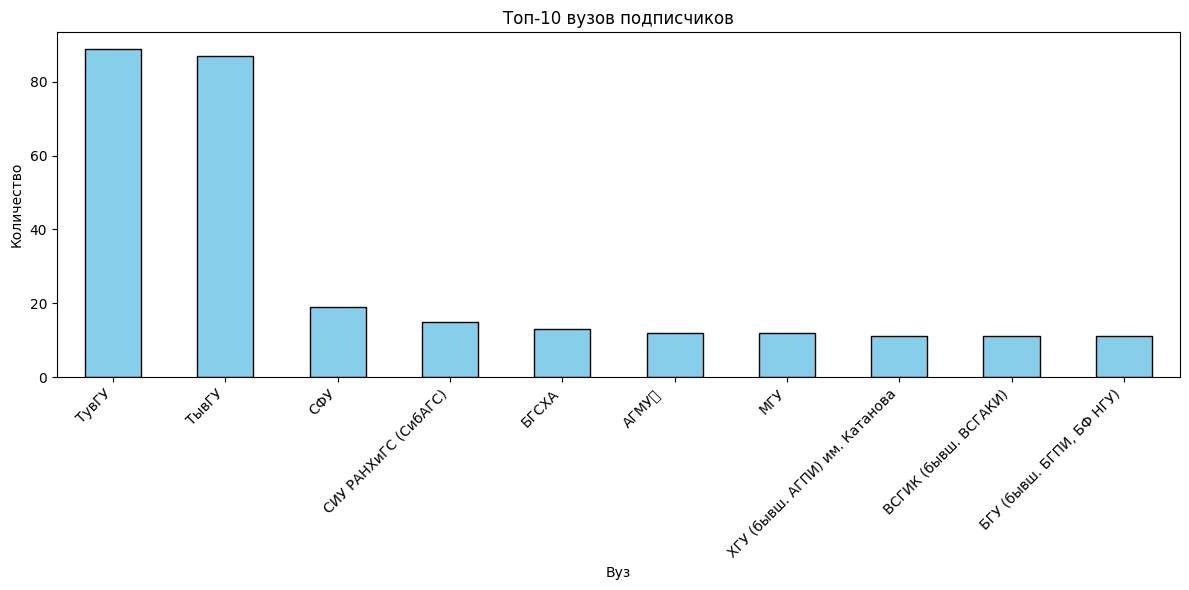

In [19]:
# –°–æ–±–∏—Ä–∞–µ–º –≤—Å–µ –Ω–∞–∑–≤–∞–Ω–∏—è –≤—É–∑–æ–≤ –∏–∑ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã—Ö —Å–ø–∏—Å–∫–æ–≤
universities_list = []

for user in df['universities'].dropna():
    try:
        if isinstance(user, list):  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ —ç—Ç–æ —Å–ø–∏—Å–æ–∫
            for uni in user:
                name = uni.get('name') or uni.get('chair_name')  # –ë–µ—Ä—ë–º 'name' –∏–ª–∏ 'chair_name'
                if name:
                    universities_list.append(name)
    except Exception as e:
        continue  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –æ—à–∏–±–∫–∏

# –í DataFrame –∏ —Å—á–∏—Ç–∞–µ–º
df_uni = pd.DataFrame(universities_list, columns=['university'])
top_unis = df_uni['university'].value_counts().head(10)

# –ü—Ä–æ–≤–µ—Ä–∏–º, –µ—Å—Ç—å –ª–∏ —á—Ç–æ-—Ç–æ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è
print("–¢–æ–ø –≤—É–∑–æ–≤:")
print(top_unis)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –µ—Å—Ç—å –¥–∞–Ω–Ω—ã–µ
if not top_unis.empty:
    plt.figure(figsize=(12, 6))
    top_unis.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('–¢–æ–ø-10 –≤—É–∑–æ–≤ –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤')
    plt.xlabel('–í—É–∑')
    plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö –æ –≤—É–∑–∞—Ö –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏.")


In [20]:
df.groupby('deactivated')['first_name'].count()

deactivated
banned      501
deleted    1437
Name: first_name, dtype: int64

In [21]:
df['sex'].value_counts()

sex
1    6196
2    3800
0       4
Name: count, dtype: int64

In [22]:
df.sort_values(ascending=False, by=['followers_count'])

id                                city  has_photo  \
491     9595595  {'id': 73, 'title': 'Krasnoyarsk'}          1   
8699  141126295        {'id': 1, 'title': 'Moscow'}          1   
2297   54945083                                 NaN          1   
8048  138177444        {'id': 76, 'title': 'Kyzyl'}          1   
1362   29535764                                 NaN          1   
...         ...                                 ...        ...   
9981  149152317                                 NaN          1   
9982  149155912        {'id': 76, 'title': 'Kyzyl'}          0   
9987  149167716        {'id': 76, 'title': 'Kyzyl'}          1   
9991  149212894        {'id': 76, 'title': 'Kyzyl'}          1   
9994  149246449        {'id': 1, 'title': 'Moscow'}          1   

                                last_seen  followers_count  relation  \
491   {'platform': 7, 'time': 1743595484}          28061.0       6.0   
8699  {'platform': 4, 'time': 1743586218}          23531.0       1.0   
2297  {'platform': 2, 'time': 1743603164}          20623.0       4.0   
8048  {'platform': 2, 'time': 1743603092}          20280.0       NaN   
1362  {'platform': 7, 'time': 1743600306}          16646.0       NaN   
...                                   ...              ...       ...   
9981  {'platform': 4, 'time': 1743601389}              NaN       NaN   
9982                                  NaN              NaN       NaN   
9987  {'platform': 4, 'time': 1743602411}              NaN       NaN   
9991  {'platform': 4, 'time': 1743602231}              NaN       NaN   
9994  {'platform': 4, 'time': 1743602497}              NaN       NaN   

                                               personal  \
491   {'alcohol': 0, 'inspired_by': '–ì—Ä–µ–≥ –ü–ª–∏—Ç, –ê—Ä–Ω–æ...   
8699  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
2297  {'alcohol': 0, 'inspired_by': '', 'langs': ['–†...   
8048                                                NaN   
1362                                                NaN   
...                                                 ...   
9981                                                NaN   
9982                                                NaN   
9987                                                NaN   
9991                                                NaN   
9994                                                NaN   

                                           universities  sex first_name  \
491                                                  []    2       Ivan   
8699                                                 []    2       Oleg   
2297  [{'chair': 64263, 'chair_name': '–ê–≥—Ä–æ–Ω–æ–º–∏—è', '...    2     Sergey   
8048                                                NaN    2   Pozyvnoy   
1362                                                NaN    1      Diana   
...                                                 ...  ...        ...   
9981                                                NaN    2       Eres   
9982                                                NaN    1    DELETED   
9987                                                NaN    1      Yulia   
9991                                                NaN    1    Ruslana   
9994                                                NaN    1    Aldynay   

          last_name  can_access_closed  is_closed  \
491   Vladimirovich               True      False   
8699      Demyokhin               True      False   
2297  Zhestyannikov               True      False   
8048         Artist               True      False   
1362          Dovut               True      False   
...             ...                ...        ...   
9981            Ool              False       True   
9982                              True      False   
9987        Mongush              False       True   
9991          Irgit              False       True   
9994       Arturova              False       True   

                                                 status       bdate  \
491           

In [23]:
df.groupby('first_name')['relation'].count().sort_values(ascending=False)

first_name
Alexander        28
Alexey           21
Aydyn            20
Choduraa         17
Arzhaana         16
                 ..
Adygjy            0
Zhanneta          0
Zhasmin           0
Zhemchuzhnaya     0
Zhenka            0
Name: relation, Length: 1861, dtype: int64